# Numpy, Pandas - Carga y Manipulacion de Datos

## Introduccion del Dataset

Utilizaremos una base de datos de ventas con las siguientes tablas: Customers, Products, Orders y OrderItems. [**Schema SQL**](https://github.com/estebanmatias92/curso-python-avanzado-plan-de-estudio-CFL415/blob/main/modulo-3/demo/data/sales.sql)

### Customers

| Campo | Tipo | Especificaciones |
| --- | --- | --- |
| CustomerID | INTEGER | PRIMARY KEY |
| FirstName | TEXT | |
| LastName | TEXT | |
| Email | TEXT | |

### Products

| Campo | Tipo | Especificaciones |
| --- | --- | --- |
| ProductID | INTEGER | PRIMARY KEY |
| ProductName | TEXT | |
| Price | REAL | |

### Orders

| Campo | Tipo | Especificaciones |
| --- | --- | --- |
| OrderID | INTEGER | PRIMARY KEY |
| CustomerID | INTEGER | FOREIGN KEY REFERENCES Customers(CustomerID) |
| OrderDate | DATE | |

### OrderItems

| Campo | Tipo | Especificaciones |
| --- | --- | --- |
| OrderItemID | INTEGER | PRIMARY KEY |
| OrderID | INTEGER | FOREIGN KEY REFERENCES Orders(OrderID) |
| ProductID | INTEGER | FOREIGN KEY REFERENCES Products(ProductID) |
| Quantity | INTEGER | |

## Carga de Datos

Usaremos la libreria **sqlite3** de Python para crear la base de datos a partir de un **script sql** ([sales.sql](https://github.com/estebanmatias92/curso-python-avanzado-plan-de-estudio-CFL415/blob/main/modulo-3/demo/sales.sql)). Esto creara e inicizalizara con valores la base de datos y nos conectara a ella.
Luego con **Pandas** podremos para cargar las tablas de la DB en **DataFrames** para luego manipular los datos.

In [9]:
import sqlite3
import pandas as pd

# Crea una conexión a la base de datos (se creará si no existe)
conn = sqlite3.connect('data/sales.db')

# Abre el archivo SQL
with open('data/sales.sql', 'r') as sql_file:
    sql_script = sql_file.read()

# Ejecuta el script SQL
conn.executescript(sql_script)

# Cargar los datos en un DataFrame
df_customers = pd.read_sql_query('SELECT * FROM Customers', conn)
df_products = pd.read_sql_query('SELECT * FROM Products', conn)
df_orders = pd.read_sql_query('SELECT * FROM Orders', conn)
df_order_items = pd.read_sql_query('SELECT * FROM OrderItems', conn).set_index("OrderItemID")

# Mostrar los primeros valores de cada DataFrame
print("\n", df_customers.head(2))
print("\n", df_products.head(2))
print("\n", df_orders.head(2))
print("\n", df_order_items.head(2))

# Cerrar la conexión a la base de datos
conn.close()


    CustomerID FirstName LastName                      Email
0           1    George    Davis   george.davis@example.com
1           2    Hannah   Garcia  hannah.garcia@example.com

    ProductID ProductName  Price
0          1   Raspberry    3.0
1          2      Orange    0.8

    OrderID  CustomerID   OrderDate
0        1           7  2023-01-01
1        2           2  2023-01-01

              OrderID  ProductID  Quantity
OrderItemID                              
1                  1          8         9
2                  2         14         7


: 

## Numpy

Podemos usar Numpy para realizar cálculos en los datos de las tablas. Por ejemplo, podríamos calcular el precio total de cada pedido.

In [2]:
import numpy as np

# Agroupar la tabla OrderItems por ProductID para reducir los 30 registros a 20 
quantity_by_product = df_order_items.groupby('ProductID')['Quantity'].sum().reset_index()
# Hacer join de la tabla Products con la tabla OrderItems a traves del campo 'ProductID'
merged_products_order_items = pd.merge(df_products, quantity_by_product, on='ProductID')

# Convertir las columnas de precios y cantidades a arrays de Numpy
prices = np.array(df_products['Price']) 
quantities = np.array(merged_products_order_items['Quantity'])
#print("Precios productos: ", prices) # 20 elementos
#print("Cantidades productos: ", quantities) # 20 elementos

# Calcular el precio total de cada pedido
total_prices = prices * quantities
print("Precios totales:", total_prices)

Precios totales: [24.   4.   3.4  6.3  2.  10.8 11.   8.1  2.  22.  24.   2.1  2.4 15.6
 16.9  6.5 12.8 17.5  6.  20.7]


## Pandas

Podemos usar Pandas para manipular y analizar los datos de las tablas. Por ejemplo, podríamos agrupar los pedidos por cliente y calcular el total de ventas para cada cliente.

In [3]:
# Unir los DataFrames
df = pd.merge(df_orders, df_order_items, on='OrderID')
df = pd.merge(df, df_products, on='ProductID')

# Calcular el total de ventas para cada pedido
df['TotalPrice'] = df['Price'] * df['Quantity']

# Agrupar por CustomerID y calcular el total de ventas para cada cliente
total_sales = df.groupby('CustomerID')['TotalPrice'].sum()
print(total_sales)

CustomerID
1     20.2
2     15.9
3     34.4
4     17.0
5     29.5
6     19.8
7     28.8
8     17.4
9     29.1
10     6.0
Name: TotalPrice, dtype: float64


## Matplotlib

Podemos usar Matplotlib para visualizar los datos de las tablas. Por ejemplo, podríamos crear un gráfico de barras del total de ventas para cada cliente.

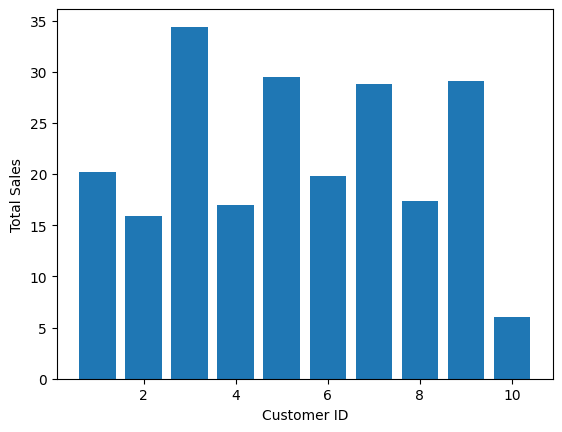

In [4]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras del total de ventas para cada cliente
plt.bar(total_sales.index, total_sales.values)
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()